In [2]:
import pandas as pd
import numpy as np

In [3]:
try:
    
    test_csv = pd.read_csv("Casos por Dia (test).csv")
    train_csv = pd.read_csv("Casos por Dia (train).csv")
    
except Exception as e:
    print(e)

In [4]:
len(train_csv),len(test_csv)

(78, 82)

In [5]:
train_csv

,Dias,Confirmados,Óbitos,Novos por Dia,Unnamed: 4,Semana,Conf/Semana,Obt/Semana,Novos/Semana,Unnamed: 9,Novos/Dia
0,18/03,0,NaN,0,NaN,12.0,4.0,0.0,4.0,NaN,236.0
1,19/03,3,NaN,3,NaN,13.0,11.0,1.0,7.0,NaN,NaN
2,20/03,4,NaN,1,NaN,14.0,24.0,4.0,13.0,NaN,NaN
3,21/03,4,NaN,0,NaN,15.0,47.0,7.0,23.0,NaN,NaN
4,22/03,6,NaN,2,NaN,16.0,144.0,10.0,97.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
73,30/05,4931,161.0,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,31/05,5119,168.0,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,01/06,5506,180.0,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,02/06,5828,192.0,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_csv

,Dias,Confirmados,Óbitos,Novos por Dia,Unnamed: 4,Semana,Conf/Semana,Obt/Semana,Novos/Semana,Unnamed: 9,Novos/Dia
0,18/03,0,NaN,0,NaN,12.0,4.0,0.0,4.0,NaN,143.0
1,19/03,3,NaN,3,NaN,13.0,11.0,1.0,7.0,NaN,NaN
2,20/03,4,NaN,1,NaN,14.0,24.0,4.0,13.0,NaN,NaN
3,21/03,4,NaN,0,NaN,15.0,47.0,7.0,23.0,NaN,NaN
4,22/03,6,NaN,2,NaN,16.0,144.0,10.0,97.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
77,03/06,6064,202.0,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,04/06,6717,217.0,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,05/06,7105,224.0,388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,06/06,7478,239.0,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_csv = test_csv[len(train_csv):]

In [8]:
test_csv

,Dias,Confirmados,Óbitos,Novos por Dia,Unnamed: 4,Semana,Conf/Semana,Obt/Semana,Novos/Semana,Unnamed: 9,Novos/Dia
78,04/06,6717,217.0,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,05/06,7105,224.0,388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,06/06,7478,239.0,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,07/06,7621,254.0,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test_csv = test_csv.drop(['Novos/Dia','Unnamed: 9','Novos/Semana','Obt/Semana','Conf/Semana','Semana','Unnamed: 4','Dias'],axis=1)

In [10]:
train_csv = train_csv.drop(['Novos/Dia','Unnamed: 9','Novos/Semana','Obt/Semana','Conf/Semana','Semana','Unnamed: 4','Dias'],axis=1)

In [11]:
train_csv.fillna(0, inplace=True)
test_csv.fillna(0, inplace=True)

In [12]:
train_csv

,Confirmados,Óbitos,Novos por Dia
0,0,0.0,0
1,3,0.0,3
2,4,0.0,1
3,4,0.0,0
4,6,0.0,2
...,...,...,...
73,4931,161.0,186
74,5119,168.0,188
75,5506,180.0,387
76,5828,192.0,322


In [13]:
test_csv

,Confirmados,Óbitos,Novos por Dia
78,6717,217.0,653
79,7105,224.0,388
80,7478,239.0,373
81,7621,254.0,143


In [18]:
from sklearn.linear_model import LinearRegression

In [42]:
X_train = train_csv.drop('Óbitos',axis=1).values
y_train = train_csv.drop(['Confirmados','Novos por Dia'],axis=1).values.ravel()

In [43]:
X_train.shape,y_train.shape

((78, 2), (78,))

In [44]:
X_test = test_csv.drop('Óbitos',axis=1).values
y_test = test_csv.drop(['Confirmados','Novos por Dia'],axis=1).values.ravel()

In [47]:
X_test.shape,y_test.shape

((4, 2), (4,))

In [48]:
import matplotlib.pyplot as plt

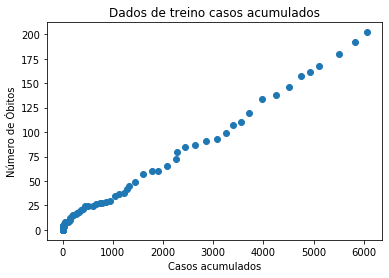

In [84]:
plt.scatter(X_train[0:,0],y_train)
plt.title("Dados de treino casos acumulados")
plt.xlabel("Casos acumulados")
plt.ylabel("Número de Óbitos")
plt.show()

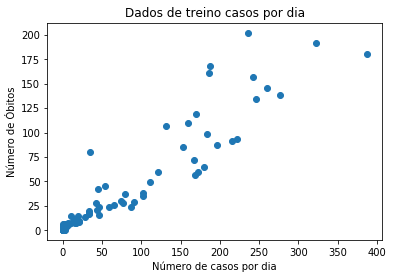

In [86]:
plt.scatter(X_train[0:,1],y_train)
plt.title("Dados de treino casos por dia")
plt.xlabel("Número de casos por dia")
plt.ylabel("Número de Óbitos")
plt.show()

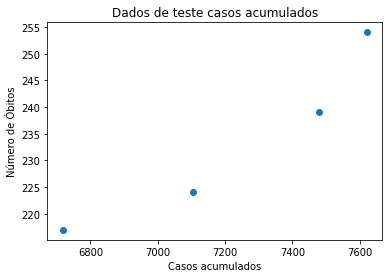

In [89]:
plt.scatter(X_test[0:,0],y_test)
plt.title("Dados de teste casos acumulados")
plt.xlabel("Casos acumulados")
plt.ylabel("Número de Óbitos")
plt.show()

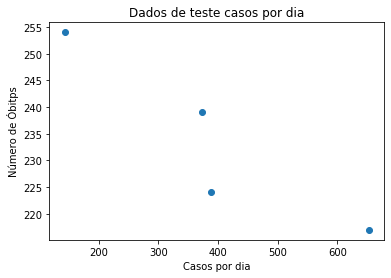

In [91]:
plt.scatter(X_test[0:,1],y_test)
plt.title("Dados de teste casos por dia")
plt.xlabel("Casos por dia")
plt.ylabel("Número de Óbitps")
plt.show()

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model1 = LinearRegression()

In [94]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
pred_test = model1.predict(X_test)

In [98]:
pred_train = model1.predict(X_train)

In [97]:
print("Predições do modelo: ",pred_test)
print("Reais ",y_test)

print(pred_test - y_test)

Predições do modelo:  [214.27908313 228.96696495 241.09104184 247.60603401]
Reais  [217. 224. 239. 254.]
[-2.72091687  4.96696495  2.09104184 -6.39396599]


In [99]:
print("Predições do modelo: ",pred_train)
print("Reais ",y_train)

print(pred_train - y_train)

Predições do modelo:  [  3.63321506   3.70474822   3.75356776   3.76189282   3.80958159
   3.8262317    3.87392047   3.89057058   3.91441496   3.92274002
   3.97042879   4.10630083   4.19561487   4.21226498   4.23610936
   4.24443442   4.31596758   4.38863151   4.40528162   4.45297039
   4.58884243   4.7973784    4.90334255   4.94383704   5.09522841
   5.24055628   5.4407672    5.90439714   6.42743324   6.82292234
   7.41523005   8.09078829   8.59943582   9.38362939  10.09361861
  10.52240793  11.7108253   12.9044869   13.99824786  15.06816443
  16.3920442   17.85518832  19.64495959  22.21059937  24.48476413
  26.86191037  28.50440371  31.02389513  33.54595959  36.59414097
  39.35084733  42.44897903  44.37113187  46.03335614  49.12963593
  54.08341819  59.59158669  63.90866664  69.20798768  74.68850984
  76.91334727  80.85291529  86.8239926   93.59057122 100.67391151
 106.90944048 111.58870932 116.50271822 121.88827247 129.16925063
 137.82210884 146.32768912 154.26254454 160.71226335 1

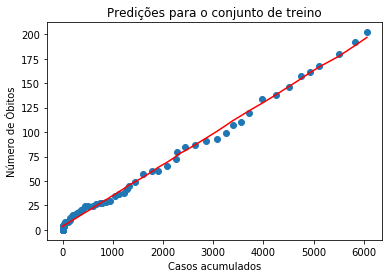

In [104]:
plt.scatter(X_train[0:,0],y_train)
plt.plot(X_train[0:,0],pred_train,color='r')
plt.xlabel("Casos acumulados")
plt.ylabel("Número de Óbitos")
plt.title("Predições para o conjunto de treino")

plt.show()

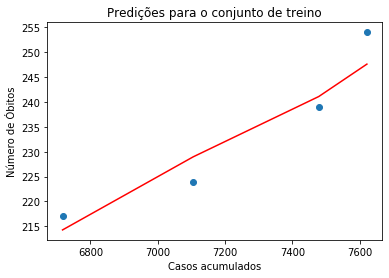

In [154]:
plt.scatter(X_test[0:,0],y_test)
plt.plot(X_test[0:,0],pred_test,color='r')
plt.xlabel("Casos acumulados")
plt.ylabel("Número de Óbitos")
plt.title("Predições para o conjunto de treino")

plt.show()